In [2]:
from sympy import *
from sympy.plotting import plot3d
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

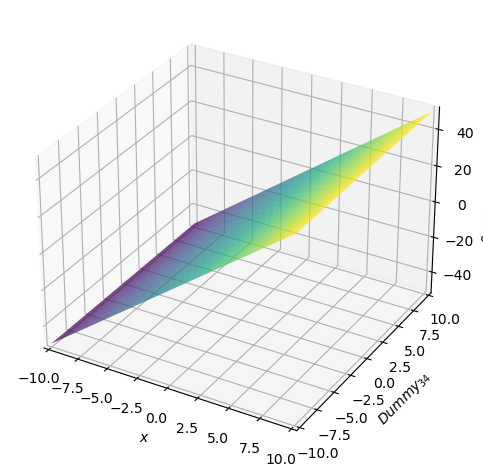

In [3]:
x,y = symbols('x y')
f=2*x + 3*x
plot3d(f);

In [4]:
x=symbols('x')
expr=x**2 / x**5
print(expr)

x**(-3)


**Task**  
You loan 100$ with 20% interest annualy.Interest rate compaunded monthly thus =0.20/12
How much will be the loan after two years

**Variables**  
A: balance(i.e. total loan agter two years)  
P: starting investment(i.e. your initial amount of loan)  
r: interest rate  
t: time span(i.e. timespan- total period of loan)  
n: number of month in timespan  
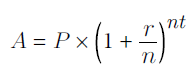

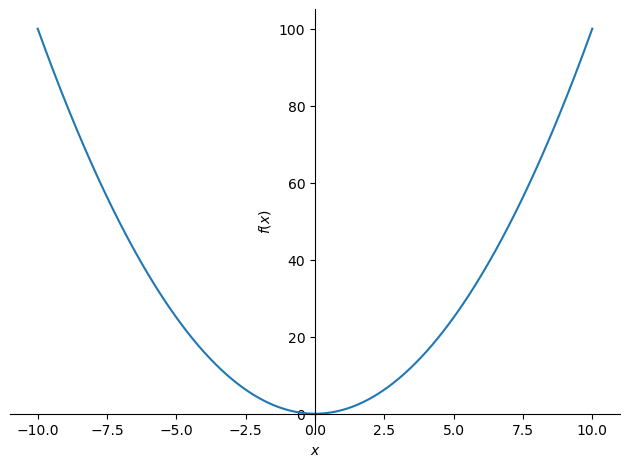

In [5]:
x=symbols('x')
f=x**2
plot(f)

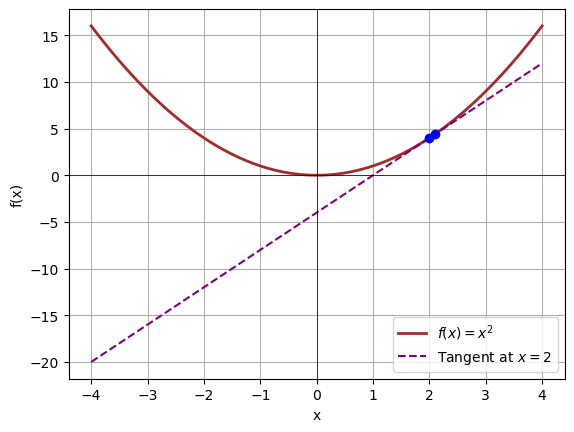

In [6]:
x = symbols('x')
f = x**2

x0 = 2

f_x0 = f.subs(x, x0)
f_prime = diff(f, x)
slope = f_prime.subs(x, x0)

tangent_line = slope * (x - x0) + f_x0

f_numeric = lambdify(x, f, "numpy")
tangent_numeric = lambdify(x, tangent_line, "numpy")

x_vals = np.linspace(-4, 4, 100)
y_vals = f_numeric(x_vals)
tangent_vals = tangent_numeric(x_vals)

plt.plot(x_vals, y_vals, label='$f(x) = x^2$', color="brown", linewidth=2)
plt.plot(x_vals, tangent_vals, label='Tangent at $x = 2$', color="purple", linestyle="--", linewidth=1.5)

plt.scatter([x0, x0 + 0.1], [f_numeric(x0), f_numeric(x0 + 0.1)], color="blue", zorder=5)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

## Derivateive calculator

In [7]:
def derivative_x(f,x,step_size):
    m=(f(x + step_size) - f(x)) / ((x+step_size) -x)
    return m

def my_func(x):
    return x**2

slope_at_2= derivative_x(my_func, 2, 1e-5)

In [8]:
x=symbols('x')
f=x**2
dx_f=diff(f)
print(dx_f)

2*x


dx_f:6*x**2, dy_f:9*y**2


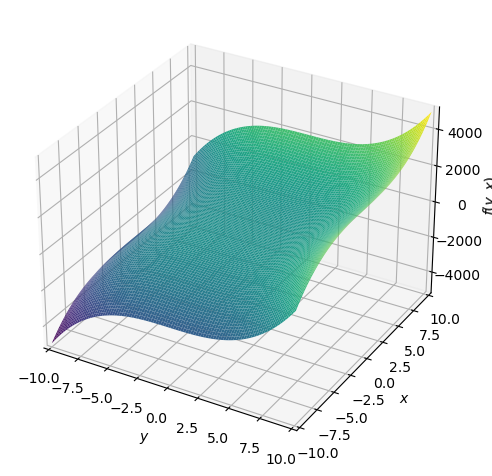

In [9]:
x,y=symbols('x y')
f=2*x**3 + 3*y**3

dx_f=diff(f,x)
dy_f=diff(f,y)

print(f'dx_f:{dx_f}, dy_f:{dy_f}')

plot3d(f)

In [10]:
x, y=symbols('x y')

_y= x**2 + 1
dy_dx= diff(_y)

z= y**3 - 2
dz_dy = diff(z)

dz_dx_chain= (dy_dx * dz_dy).subs(y, _y)
dz_dx_no_chain = diff(z.subs(y,_y))

print(dz_dx_chain)
print(dz_dx_no_chain)

6*x*(x**2 + 1)**2
6*x*(x**2 + 1)**2


## Vectors

In [11]:
import numpy as np

row_vec=np.array([[1,2,3]])
col_vec=np.array([[1],[2],[3]])

In [12]:
s=2.0
b=np.array([3,4,5])
print(b*s)

[ 6.  8. 10.]


## Integrals

### Manual approach

In [13]:
%%time

def approximate_integral(a, b,n ,f):
    '''
    Args:
        a: x axis range minima
        b: x axis range maxima
        n: number of rectangles
        f: integrating function
    '''

    delta_x = (b - a) / n
    total_sum = 0

    for i in range(1, n+1):
        midpoint= .5 * (2 * a + delta_x * (2 *i - 1))
        total_sum += f(midpoint)

    return total_sum * delta_x

def my_function(x):
    return x**2 +1

area = approximate_integral(a=0, b=1, n=100_000_000, f=my_function)
print(f'Area:{ area}')

Area:1.3333333333340978
CPU times: user 14.4 s, sys: 0 ns, total: 14.4 s
Wall time: 15 s


### SymPy approach

In [14]:
%%time
x= symbols('x')
f=x**2 + 1

area = integrate(f, (x, 0, 1))
print(f'Area: {area}')

Area: 4/3
CPU times: user 28.3 ms, sys: 0 ns, total: 28.3 ms
Wall time: 28.6 ms


### SymPy with limits

In [15]:
%%time
x, i, n = symbols('x i n')

f= x**2 + 1
lower, upper = 0, 1
# determine length of each rectangle
delta_x = ((upper - lower) / n)

# Calculate width and each rectangle height at index i
x_i = (lower + delta_x * i)
fx_i = f.subs(x, x_i)

#Iterate all n recangles and sum their areas
n_rectangles= Sum(delta_x * fx_i, (i, 1, n)).doit()

# Calculate the area by approaching the number of rectangles n to infinity
area=limit(n_rectangles, n, oo)

print(f'Area: {area}')

Area: 4/3
CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 110 ms


# Statistics

## Distributions

#### Variance

variance is the measure of how spread out our data is

$
\sigma^2 = \frac{\sum \left( x_i - \mu \right)^2}{N}   \text{i.e.} \text{variance} = \frac{(x_1 - \text{mean})^2 + (x_2 - \text{mean})^2 + \dots + (x_n - \text{mean})^2}{N}
$

In [16]:
data= [0,1,2,3,4,5,6,7,8]

def variance(val):
    mean= sum(val) / len(val)
    _variance = sum((v - mean) **2 for v in val) / len(val)
    return _variance

print(variance(data))

6.666666666666667


#### Standard Deviation

Standard deviation is the square rooted variance, and because of that it represents more meaningfull values spreaded out around mean

$
\sigma = \sqrt\frac{\sum \left( x_i - \mu \right)^2}{N} 
$

In [17]:
from math import sqrt

def std_dev(val):
    return sqrt(variance(data))

print(std_dev(data))

2.581988897471611


#### Normal Distribution

In [18]:
# Generating random numbers with weights from a normal distribution

import random
from scipy.stats import norm

for i in range(0,1000):
    random_p= random.uniform(0.0, 1.0)
    random_weight= norm.ppf(random_p, loc=64.43, scale=2.99)
    print(random_weight)

62.8293186457232
65.50791701379487
60.879884392549634
68.77084290821682
65.75750398401452
62.57210004081841
60.51756997957508
58.2670908286261
66.48401635122154
60.422277405671025
65.50345048462678
63.39826613263407
63.049128889213534
66.05783986343621
66.6081563911812
68.52735473515557
61.81704797757028
59.799037090309874
61.435365128525405
68.9292638598435
63.077891484140004
68.3954058772293
68.83264793362203
67.70539397354966
65.86639167335964
66.74790961644717
59.49101302876501
70.10731202500406
61.06793352252507
61.76323538602547
63.490465946476405
62.78458674401345
66.52187719545643
64.08300159303856
64.0048726603956
68.24796566741625
58.9736900110887
61.392654139665844
63.92368821419934
65.68621585514921
68.93281818907444
60.85716054162107
65.07945903585968
66.58136486574745
64.29529992956601
65.80770203416404
59.981426154222845
68.50886769377657
63.537178556954935
66.73837863507217
61.20747854619458
62.07932798538235
69.50579646107968
61.41276226246246
68.11674267644587
65.4636

#### PDF (Probability Density Function)

The PDF describes the likelihood of a continious random variable taking on a specific range of values

$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e{-\frac{1}{2}} \left( \frac{x - \mu^2}{\sigma} \right)
$

In [19]:
def mormal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1.0 / (2.0 * math.pi * std_dev **2) ** 0.5) * math.exp(-1.0 * ((x - mean) **2 / (2.0 * std_dev **2)))

#### CDF (Cumulative Distribution Function)

CDF provides the area up to a given x-value for a given distribution.

<img src="./images/pdf-cdf.png" width="350" />

In [20]:
from scipy.stats import norm
mean = 64.43
std_dev = 2.99
x = norm.cdf(64.43, mean, std_dev)

2024-11-28 22:18:40.908486: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-28 22:18:41.134562: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-28 22:18:41.134621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-28 22:18:41.139839: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-28 22:18:41.139906: I external/local_xla/xla/stream_executor

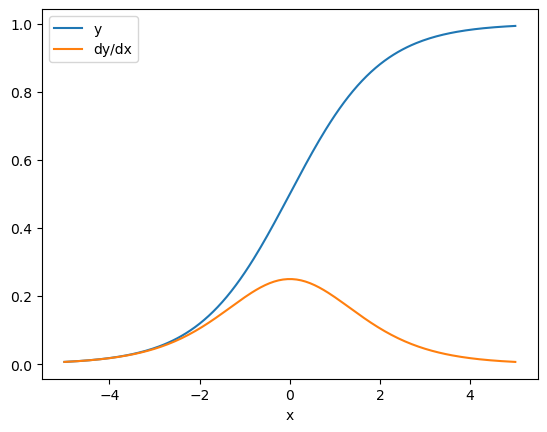

In [21]:
# 201 datapoints in rank-0 tenzor with equal distribution
x= tf.linspace(-5.0,5.0,200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    y= tf.nn.sigmoid(x)

grad_y_x= tape.gradient(y,x)

plt.plot(x,y, label='y')
plt.plot(x, grad_y_x,label='dy/dx')
plt.legend()
_=plt.xlabel('x')
plt.grid=True

# Matrices

In [22]:
# System of equations
# 4x + 2y + 4z = 44
# 5x + 3y + 7z = 56
# 9x + 3y + 6z = 72

A= Matrix(
    [
        [4,2,4],
        [5,3,7],
        [9,3,6]
    ]
)

inverse= A.inv()
identity= inverse * A
print("INVERSE: {}".format(inverse))

INVERSE: Matrix([[-1/2, 0, 1/3], [11/2, -2, -4/3], [-2, 1, 1/3]])


# Linear Regression

<img src="./images/lr.png" width="350" />

m= [1.93939394]
b= [4.73333333]


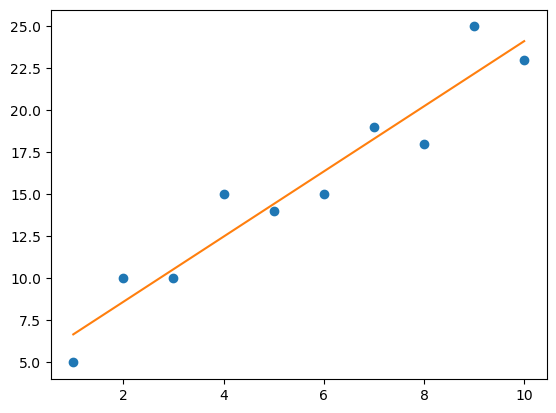

In [23]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

# Extract Input Variables  all rows all columns except last colums
X= df.values[:,:-1]

# Extract output column(all rows, last column)
y= df.values[:,-1]

# fit a line to the points
fit= LinearRegression().fit(X,y)

m= fit.coef_.flatten()
b= fit.intercept_.flatten()
print('m= {0}'.format(m))
print('b= {0}'.format(b))

# plot Scatterplot
plt.plot(X,y,'o')

# plot line
plt.plot(X, m*X+b)

plt.show()

## Linear residuals

In [24]:
# Calcuate residuals
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()

for p in points:
    y_actual = p.y
    y_pred= m*p.x +b
    resid= y_actual - y_pred
    print(resid)

[-1.67272727]
[1.38787879]
[-0.55151515]
[2.50909091]
[-0.43030303]
[-1.36969697]
[0.69090909]
[-2.24848485]
[2.81212121]
[-1.12727273]


## Square residuals

<img src="./images/lr_sqr.png" width="450" />

In [25]:
# Calcuate residuals
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()

sum_of_sqr= 0.0

for p in points:
    y_actual= p.y
    y_pred= m*p.x + b
    resid_sqr= (y_actual - y_pred)**2
    sum_of_sqr+=resid_sqr

print('sum of squares: {0}'.format(sum_of_sqr))

sum of squares: [28.0969697]


## Finding the best fit line

**Closed formula**
<div style="font-size:24px">
$m = \frac{n\Sigma xy - \Sigma x \Sigma y}{n\Sigma x^2 - (\Sigma x)^2}$

$b = \frac{\Sigma y}{n} - m \frac{\Sigma x}{n}$
</div>

In [26]:
points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples())

n= len(points)

m_manual= (n*sum(p.x * p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points) 
   ) / ( 
   n*sum(p.x**2 for p in points) - (sum(p.x for p in points)**2) )

b_manual= (sum(p.y for p in points) / n) - m * (sum(p.x for p in points) / n)
print(m,b)
print(m_manual, b_manual)

[1.93939394] [4.73333333]
1.9393939393939394 [4.73333333]


### Using inverse and transposed matrices to fit a linear regression

In [44]:
from numpy.linalg import inv, qr
df= pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

# Extract input variables (all rowsm all columns but last column)
X= df.values[:,:-1].flatten()

# Add placeholder '1' column to generate intercept
# this will generate the intercept β0 coefficient. Since this column is all 1s,it effectively generates the intercept and not just a slope β1.
X_1= np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rowsm, last column)
Y= df.values[:,-1]

# Calculate coefs for slope and intercept
Q,R=qr(X_1)
b_qr= inv(R).dot(Q.transpose()).dot(Y)
b= inv(X_1.T @ X_1) @ (X_1.T @ Y)
print(b)

# Predict against Y-values
y_pred= X_1.dot(b)

[1.93939394 4.73333333]


In [43]:
print(y_pred)

[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


### Gradient Descent

- gradient descent has an attractive feature: the partial derivative this is that flashlight, allowing us to see the slopes for every parameter (in this case m and b, or β0 and β1).
- calculate the length of this step by taking a fraction of the slope. This fraction is known as learning rate. The higher the learning rate, the faster it will run at the cost of
accuracy.

In [46]:
def f(x):
    return (x-3)**2 + 4

def dx_f(x):
    return 2 * (x - 3)

# learning rate
L= .001

iterations= 100_000

# start at random point
x= random.randint(-15,15)

for i in range(iterations):
    # get slope
    d_x= dx_f(x)

    # update x by substracting the (learning rate) * (slope)
    x -= L * d_x

print(x, f(x))

3.000000000000111 4.0


%%manim -v WARNING -qm GradientDescentScene

from manim import *

class GradientDescentScene(Scene):
    def f(self, x):
        """Quadratic function."""
        return (x - 3) ** 2 + 4

    def df(self, x):
        """Derivative of the quadratic function."""
        return 2 * (x - 3)

    def construct(self):
        # Axes setup
        axes = Axes(
            x_range=[-5, 10, 1],
            y_range=[0, 50, 5],
            axis_config={"include_numbers": True},
            tips=False,
        )
        labels = axes.get_axis_labels(x_label="x", y_label="f(x)")

        # Function graph
        graph = axes.plot(self.f, color=RED)
        graph_label = axes.get_graph_label(graph, label="f(x)=(x-3)^2+4", x_val=8, direction=UP)

        # Dot for gradient descent visualization
        dot = Dot(color=GREEN).move_to(axes.c2p(-4, self.f(-4)))
        dot_label = MathTex("x").next_to(dot, DOWN)

        # Learning rate
        learning_rate = 0.05

        # Adding elements to the scene
        self.play(Create(axes), Create(graph), Write(labels), Write(graph_label))
        self.play(FadeIn(dot, dot_label))

        # Gradient Descent Loop
        x_val = -4  # Starting point
        for _ in range(30):  # 30 iterations of gradient descent
            new_x_val = x_val - learning_rate * self.df(x_val)
            new_y_val = self.f(new_x_val)

            self.play(
                dot.animate.move_to(axes.c2p(new_x_val, new_y_val)),
                dot_label.animate.next_to(dot, DOWN),
                run_time=0.3
            )

            # Update x_val for next iteration
            x_val = new_x_val

        # Show final point and minimum
        self.wait(2)
        minimum = Dot(color=YELLOW).move_to(axes.c2p(3, self.f(3)))
        self.play(FadeIn(minimum), Indicate(minimum, color=YELLOW))
        self.wait(3)


In [49]:
GradientDescent()

### Performin a gradient Decent

$
\text{SSE} = \sum_{i=0}^{n} \left( \underbrace{m \cdot x_i}_{\text{Predicted}} + \underbrace{b}_{\text{Intercept}} - \underbrace{y_i}_{\text{Actual}} \right)^2
$

this formula computes how well a straight line (with slope mm and intercept bb) fits a set of data points by calculating the sum of the squared differences between the predicted and actual values. The goal of linear regression is to find the values of mm and bb that minimize this sum.

In [55]:
points= list(pd.read_csv('https://bit.ly/2KF29Bd').itertuples())
m= .0
b= .0
L= .001
iterations= 100_000

# number of elements in X
n=float(len(points))

for i in range(iterations):
    # slope with respect to m and b
    D_m= sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    D_b= sum(2 * ((m * p.x + b) - p.y) for p in points)

    m -= L * D_m
    b -= L * D_b

print('y = {0}x + {1}'.format(m,b))

y = 1.9393939393939548x + 4.733333333333227


In [57]:
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)
sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))
d_m = diff(sum_of_squares, m) \
.subs(n, len(points) - 1).doit() \
.replace(x, lambda i: points[i].x) \
.replace(y, lambda i: points[i].y)
d_b = diff(sum_of_squares, b) \
.subs(n, len(points) - 1).doit() \
.replace(x, lambda i: points[i].x) \
.replace(y, lambda i: points[i].y)
# compile using lambdify for faster computation
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)
# Building the model
m = 0.0
b = 0.0
# The learning Rate
L = .001
# The number of iterations
iterations = 100_000
# Perform Gradient Descent
for i in range(iterations):
    # update m and b
    m -= d_m(m,b) * L
    b -= d_b(m,b) * L
print("y = {0}x + {1}".format(m, b))

y = 1.939393939393954x + 4.733333333333231


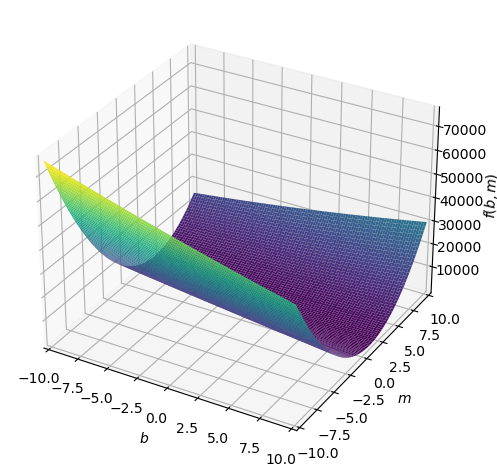

In [58]:
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)
sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n)) \
.subs(n, len(points) - 1).doit() \
.replace(x, lambda i: points[i].x) \
.replace(y, lambda i: points[i].y)
plot3d(sum_of_squares)

### Stohastic gradient descent

In [59]:
data= pd.read_csv('https://bit.ly/2KF29Bd', header=0)

X= data.iloc[:,0].values
y= data.iloc[:,1].values

n=data.shape[0]

m= .0
b= .0
sample_size= 1
L= .0001
epochs= 100_000

# Performing stochastic Gradient Descent
for i in range(epochs):
    idx= np.random.choice(n, sample_size, replace=False)
    x_sample= X[idx]
    y_sample= y[idx]

    # The current predicted value of y
    y_pred= m*x_sample + b

    # d/dm derivative of loss function
    D_m= (-2 / sample_size) * sum(x_sample * (y_sample - y_pred))

    # d/db derivative of loss function
    D_b= (-2 / sample_size) * sum(y_sample - y_pred)

    m= m - L * D_m # Update m
    b= b - L * D_b # Update b

    if i % 10000 == 0:
        print(i, m, b)

print('y= {0}x + {1}'.format(m,b))



0 0.001 0.001
10000 2.349598280237098 1.8459438427032837
20000 2.2021654219833775 2.8438412812114033
30000 2.135400810250706 3.514458219376275
40000 2.074266221933525 3.915945406628744
50000 2.0355233443287455 4.194967509015444
60000 2.007387635258048 4.382921608828423
70000 1.9749200536499045 4.506041344757054
80000 1.9150642348269253 4.582573295945507
90000 1.9478056668903037 4.629596668633372
y= 1.9576356388852674x + 4.669448921542072


## Correlation

**Pearson Corelation Coefficient** expresses the ratio of the covariance to the product of the standard deviations, normalizing it to be between -1 and 1.

$
r = \frac{n \sum{xy} - \sum{x} \sum{y}}{\sqrt{\left(n \sum{x^2} - (\sum{x})^2\right) \left(n \sum{y^2} - (\sum{y})^2\right)}}
$

- The numerator calculates the covariance between x and y.
- The denominator is the product of the standard deviations of x and y.

- $n = \text{Total number of paired data points } (x_i, y_i)$
- sum of products of paired data points $\sum{xy} = x_1 y_1 + x_2 y_2 + \cdots + x_n y_n$
- sum of all x $\sum{x} = x_1 + x_2 + \cdots + x_n$
- sum of all y $\sum{y} = y_1 + y_2 + \cdots + y_n$
- $\sum{x^2} = x_1^2 + x_2^2 + \cdots + x_n^2$
- $\sum{y^2} = y_1^2 + y_2^2 + \cdots + y_n^2$


**High variamce** - low precission

<img src="./images/high_variance.png" width="150" />

**Pearson Corelation**

<img src="./images/Pearson.png" width="450" />

In [62]:
# Corelation coef via Pandas
df= pd.read_csv('https://bit.ly/2KF29Bd')

corelations= df.corr(method='pearson')
print(corelations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


In [67]:
points= list(df.itertuples())
n=len(points)

numerator= n * sum(p.x * p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)
denominator= sqrt(n * sum(p.x**2 for p in points) - sum(p.x for p in points)**2) * sqrt(n * sum(p.y**2 for p in points) - sum(p.y for p in points))

print(f'corr: {numerator / denominator}')

corr: 0.3393484389036648


## Statistical Significance - 
is it possible I see a linear relationship in my data due to random chance?

- the population correlation coefficient with the Greek symbol ρ (Rho) 
- sample correlation coefficient is r. 

- H0:ρ = 0 (implies no relationship)
- H1:ρ ≠ 0 (relationship is present)

#### T-Distribution

It is important to remember that the t-distribution is typically used when your sample size is small, specifically n≤30. For larger sample sizes, the Central Limit Theorem suggests that the sample mean distribution approximates a normal distribution $\mathcal{N}$(μ,σ2), making it more appropriate to use the normal distribution.

However, the t-distribution should also be used if you are unsure whether the dataset represents the entire population or just a sample. The reason is that, if the data represents only a sample, the population standard deviation σσ is unknown and must be estimated from the sample. In this case, relying on the normal distribution can lead to inaccurate results, especially for small sample sizes, because the sample standard deviation might not accurately reflect the population standard deviation.

with a 95% critical value range. We account for the fact there are 10 records in our sample and therefore we have 9 degrees of freedom (10 – 1 = 9).

<img src="./images/t-distribution.png" width="250" />


We are conducting a hypothesis test to determine if the correlation coefficient $r$ is statistically significant. The correlation coefficient $r$ measures the strength and direction of a linear relationship between two variables.
- We calculate a test statistic $t$, and then compare it to the critical values from the t-distribution.
  - If the test statistic $t$ falls outside the range of critical values (e.g., for a 95% confidence level with applied degrees of freedom), we can reject the null hypothesis.
  - $t = \frac{r}{\sqrt{\frac{1 - r^2}{n - 2}}}$


**p-value** Interpretation

- the more data you have that consistently resembles a line, the more significant the p-value for your correlation will be(A low p-value  < 0.05 suggests that the correlation is significant).
- the more scattered or sparse the data, the more the p-value will increase(typically > 0.05 suggests that the correlation may have occurred by chance) and there's no strong evidence of a linear relationship.) and thus indicate your correlation occurred by random chance.

-2.2621571628540997 2.2621571628540993


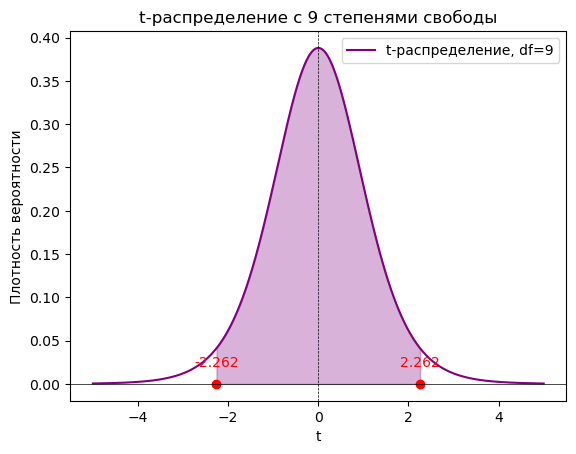

In [76]:
# The critical value is approximately ±2.262. 
# Calculate that in Python below. This captures 95% of the center area of our T-distribution.

from scipy.stats import t

n=10
df = n - 1  # степени свободы
alpha = 0.05

# Low critical value
lower_cv= t(n-1).ppf(.025)
# Upper critical value
upper_cv= t(n-1).ppf(.975)

print(lower_cv, upper_cv)

# Создаем массив значений для x и y для построения t-распределения
x = np.linspace(-5, 5, 1000)
y = t(df).pdf(x)

# Построение графика
plt.plot(x, y, color='purple', label='t-распределение, df=9')
plt.fill_between(x, y, where=(x >= lower_cv) & (x <= upper_cv), color='purple', alpha=0.3)


# Отмечаем критические значения
plt.scatter([lower_cv, upper_cv], [0, 0], color='red')
plt.text(lower_cv, 0.02, f'{lower_cv:.3f}', color='red', ha='center')
plt.text(upper_cv, 0.02, f'{upper_cv:.3f}', color='red', ha='center')

# Настройки графика
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5, linestyle='dashed')
plt.title(f"t-распределение с {df} степенями свободы")
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend()
plt.show()


In [81]:
# Perform the test
r= corelations.loc['x','y']
test_val= r / sqrt((1 - r**2) / (n - 2))

print('TEST VALUE: {}'.format(test_val))
print('CRITICAL RANGE: {}, {}'.format(lower_cv, upper_cv))

if test_val < lower_cv or test_val > upper_cv:
    print('CORELATION PROVEN, REJECT H0')
else:
    print('CORELATION NOT PROVEN, FAILED TO REJECT H0')

# calculate p-val
if test_val > 0:
    p_val= 1.0 - t(n-1).cdf(test_val)
else:
    p_val= t(n-1).cdf(test_val)

# Two tailed, so multiply by 2
p_val= p_val * 2
print('P-VALUE: {}'.format(p_val))

TEST VALUE: 9.399575927136752
CRITICAL RANGE: -2.2621571628540997, 2.2621571628540993
CORELATION PROVEN, REJECT H0
P-VALUE: 5.976327099421752e-06


**INTERIM CONCLUSION**

The test value here is approximately 9.39956, which is definitely outside the range of
(–2.262, 2.262) so we can reject the null hypothesis and say our correlation is real.
That’s because the p-value is remarkably significant: .000005976. This is well below
our .05 threshold, so this is virtually not coincidence: there is a correlation. It makes
sense the p-value is so small because the points strongly resemble a line. It is highly
unlikely these points randomly arranged themselves near a line this closely by chanc

### $R^2$ Coefficient of Determination

<img src="./images/r_squared.png" width="550" />

- measures how much variation in one variable is explainable by the variation of the other variable. Essentially, $r^2$ shows how much two variables interact with each other.

In [83]:
df= pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',')

coef_determination= df.corr(method='pearson')**2
print(coef_determination)
print(coef_determination.loc['x','y'])

          x         y
x  1.000000  0.916971
y  0.916971  1.000000
0.9169711297370873


**INTERIM CONCLUSION**

coefficient of determination of 0.916971 is interpreted as 91.6971% of the variation
in x is explained by y (and vice versa), and the remaining 8.3029% is noise caused
by other uncaptured variables; 0.916971 is a pretty good coefficient of determination,
showing that x and y explain each other’s variance. But there could be other variables
at play making up that remaining 0.083029. Remember, correlation does not equal
causation, so there could be other variables contributing to the relationship we are
seeing.

**correlation is not causation**

It could be that x and y do not cause each other at all and the correlation is just coincidental, hence why it is important we measure the **statistical significance**.

### Se - Standard Error of the esitmate

The difference between the overall error of a linear regression (SSE) and Standard error of the estimate is in that SSE provide result in squared roots which is hard to interpred, but Se instead provide estimation in same uniuts

$Se = \frac{\sum(y - \hat{y})^2}{n - 2}$

In [89]:
S_e= sqrt((sum((p.y - (m*p.x + b))**2 for p in points)) / (n-2))
print(S_e)

1.8754234420914198


## Prediction Intervals


$ E = t_{\alpha/2} \cdot S_e \cdot \sqrt{ 1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum{(x_i - \bar{x})^2}} } $

- $t_f/s$​ — критическое значение из T-распределения (например, для 95% это примерно 2.262).
- Se​ — стандартная ошибка оценки.
- n — размер выборки.
- x0​ — точка предсказания (например, возраст собаки 8.5 лет).
- $bar{x}$ — среднее значение всех x.


With a linear regression, we hope that data
follows a normal distribution in a linear fashion. A regression line serves as the
shifting “mean” of our bell curve, and the spread of the data around the line reflects
the variance/standard deviation

Интервал предсказания показывает диапазон возможных значений для предсказанного значения yy при заданном значении xx. Он указывает, где с определённой долей уверенности (например, 95%) окажется истинное значение yy.

<img src="./images/norm_distrib_lr.png" width="450" />

In [93]:
# Calculating a prediction interval of vet visits for a dog  that's 8.5 years old

# Calculate Prediction Interval for a dog age 8.5 years old
x_0= 8.5
x_mean= sum(p.x for p in points) / len(points)
t_val= t(n-2).ppf(.975)97.5% = 2.5% +95% - upper limit of 95% interval

standard_error= sqrt(sum((p.y - (m * p.x + b))**2 for p in points) / (n - 2))

margin_of_error= t_val * standard_error * sqrt(1 + (1 / n) + (n * (x_0 - x_mean)**2) / (n * sum(p.x **2 for p in points) - sum(p.x for p in points)**2))

y_pred= m*x_0 + b

# Calculate prediction interval
print(y_pred, y_pred - margin_of_error, y_pred + margin_of_error)


21.309351852066847 16.553931634117344 26.06477207001635


**INTERIM CONCLUSION**

We not only create a prediction based on a linear
regression (e.g., a dog that’s 8.5 years old will have 21.2145 vet visits), but we also are
actually able to say something much less absolute: there’s a 95% probability an 8.5
year old dog will visit the vet between 16.46 and 25.96 times

## Train Test split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extract input variables(all rows, all columns but last column)
X= df.values[:,:-1]

# Extract output column(all rows last column) i.e. target
y= df.values[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=1/3)

model= LinearRegression()
model.fit(X_train, y_train)
result= model.score(X_test, y_test)

print(f'R²: {result:.3f}')

## Cross val

#### Using a three-fold cross-val

In [100]:
from sklearn.model_selection import KFold, cross_val_score

kfold= KFold(n_splits=3, random_state=7, shuffle=True)
model=LinearRegression()
results= cross_val_score(model, X, y, cv=kfold)
print(results)

print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.82514286 0.64591573 0.2975653 ]
MSE: mean=0.590 (stdev-0.219)


#### Using a random-fold cross-vall

When you get concerned about variance in your model, one thing you can do, rather
than a simple train/test split or cross-validation, is use random-fold validation to
repeatedly shuffle and train/test split your data an unlimited number of times and
aggregate the testing results.

In [101]:
from sklearn.model_selection import ShuffleSplit

# 10 iterations of randomly sampling 1/3 of the data for testing and the other 2/3 for training. Those 10 testing 
# results are then averaged alongside their standard deviations to see how consistently the testing datasets perform.
kfolf= ShuffleSplit(n_splits=10, test_size=.33, random_state=7)

model= LinearRegression()
results= cross_val_score(model, X, y, cv=kfold)

print(results)
print('mean=%.3f (stdev-%.3f)' % (results.mean(), results.std()))

[0.82514286 0.64591573 0.2975653 ]
mean=0.590 (stdev-0.219)


#### Validation set


for preventing an overtune  model and p-hack  into a good test result, and then find model does not work well out in the real world. It is important to hold out another dataset called the validation set, especially if you are comparing different models
or configurations. That way, your tweaks on the training data to
get better performance on the testing data do not leak info into the
training. You can use the validation dataset as one last stopgap to
see if p-hacking caused you to overfit to your testing dataset.

## Multiple Linear Regression

In [105]:
# A linearRegression with 2 input variables
df= pd.read_csv('https://bit.ly/2X1HWH7', delimiter=',')

df.head()

,x1,x2,y
0,0,22,88
1,1,13,62
2,1,15,67
3,1,14,62
4,2,18,77


In [107]:
X= df.values[:,:-1]
y= df.values[:,-1]

fit= LinearRegression().fit(X,y)

# Print coeffs
print('Coefs: {0}'.format(fit.coef_))
print('INtercept: {0}'.format(fit.intercept_))
print('z={0} + {1}x + {2}y'.format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

Coefs: [2.00672647 3.00203798]
INtercept: 20.109432820035963
z=20.109432820035963 + 2.006726472512807x + 3.0020379766466925y


**REFERENCES**

https://www.youtube.com/watch?v=YX40hbAHx3s  
https://www.youtube.com/watch?v=Q_1M2JaijjQ
https://www.kdnuggets.com
https://spectrum.ieee.org/andrew-ng-xrays-the-ai-hype